### 선형회귀기반 분류 알고리즘 학습 - LogisticRegression + 교차검증

- 이진분류 및 다중분류 가능
- 분류지만 선형회귀식기반의 알고리즘이라서 Regression

In [127]:
# [1-1] 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### [1] 데이터 준비 및 확인

In [128]:
# [1-2] 데이터 준비 
filename='iris.csv'

In [129]:
# [1-3] 데이터 로딩 
irisDF= pd.read_csv(filename)

In [130]:
irisDF.head(2)

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa

- 2개 품종만 추출 

In [131]:
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [132]:
dataDF=irisDF[irisDF.variety != 'Virginica'].copy()
dataDF.shape

(100, 5)

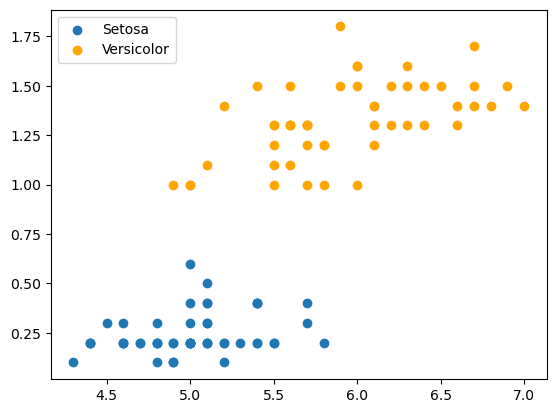

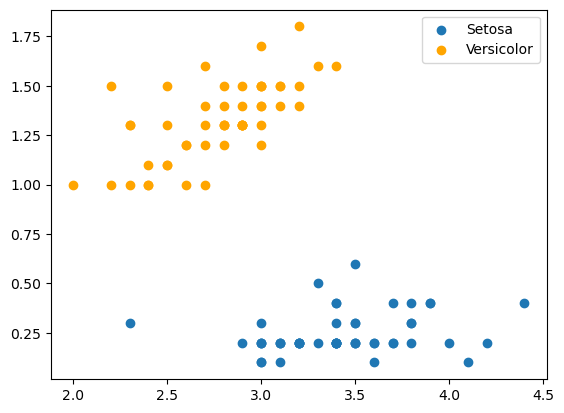

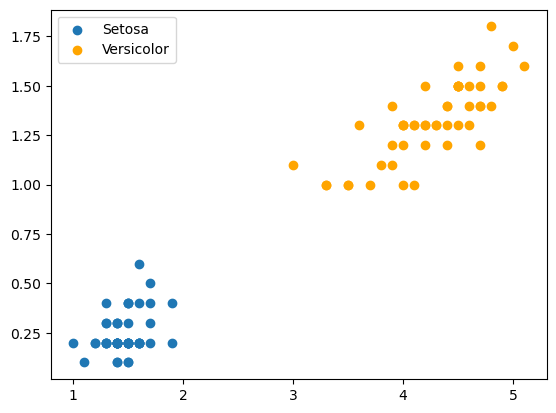

In [133]:
# 2개 품종 식별 가능한 피쳐 선택 
list1 = ['sepal.length','sepal.width','petal.length']
for i in list1:
    plt.scatter(dataDF[dataDF['variety'] == 'Setosa'][i], dataDF[dataDF['variety'] == 'Setosa']['petal.width'], label='Setosa' )
    plt.scatter(dataDF[dataDF['variety'] == 'Versicolor'][i], dataDF[dataDF['variety'] == 'Versicolor']['petal.width'], label = 'Versicolor', color='orange' )
    
    plt.legend()
    plt.show()

- 꽃잎의 길이와 너비(petal.length, petal.width) 특성만 추출

In [134]:
dataDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [135]:
dataDF=dataDF[dataDF.columns[2:]].copy()

In [136]:
dataDF.shape

(100, 3)

In [137]:
dataDF.head(3)

petal.length  petal.width variety
0           1.4          0.2  Setosa
1           1.4          0.2  Setosa
2           1.3          0.2  Setosa

In [138]:
# 품종컬럼 문자열 => 수치 형태 변환한 컬럼 추가 
pd.set_option('future.no_silent_downcasting',True)
labelToNum={'Setosa' : 0, 'Versicolor':1}
dataDF['variety_no']=dataDF.variety.replace(labelToNum)

In [139]:
dataDF.head(3)

petal.length  petal.width variety variety_no
0           1.4          0.2  Setosa          0
1           1.4          0.2  Setosa          0
2           1.3          0.2  Setosa          0

In [140]:
dataDF.corr(numeric_only=True)

petal.length  petal.width
petal.length      1.000000     0.979322
petal.width       0.979322     1.000000

In [141]:
# 시각화 그래프 

#### [2] 데이터 가공

- 피쳐/특성/독립과 타겟/클래스/종속변수 분리

In [142]:
featureDF = dataDF[dataDF.columns[:2]]  # 피쳐
classDF = dataDF.variety_no             # 타겟 

In [143]:
# object -> int
classDF = classDF.astype('int')
classDF

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: variety_no, Length: 100, dtype: int64

In [144]:
print(f'featureDF : {featureDF.shape}  classDF : {classDF.shape}')

featureDF : (100, 2)  classDF : (100,)


- 훈련용/테스트용 분리

In [145]:
# 분류 시에는 훈련용 / 테스트용에 동일한 비율로 타겟이 배분 
# ( stratify = 타겟 ) 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용, 테스트용 분리 
train_X, test_X, train_y, test_y = train_test_split(featureDF, classDF,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF)

- 특성/피쳐 2개에 대한 스케일링(피쳐 정규화) 진행   <->   모델 정규화(Ridge,Lasso 등과는 다름)

In [146]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler   

In [147]:
# StandardScaler : 평균 0, 표준편차 1, 즉 정규분포 따르도록 스케일링 
# 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함 
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [148]:
# fit 이후에 설정되는 파라미터_ : 모델 파라미터_
print(scaler.var_, scaler.mean_)

[2.12549375 0.32415   ] [2.8725 0.79  ]


In [149]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

#### [3] 학습 
- 메인학습 : 지도학습 - 분류
- 세부학습 : 선형모델 로지스틱회귀

In [150]:
# 학습모델 객체
logR=LogisticRegression()

In [151]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR.fit(train_scaled_X, train_y)

LogisticRegression()

In [152]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라미터명_
logR.classes_

array([0, 1])

In [153]:
logR.coef_

array([[2.0321802218, 1.8833977985]])

In [154]:
logR.intercept_

array([0.250126814])

#### [4] 성능평가
- 이유 : 모델이 제대로 잘 만들어 졌는지 확인
- 과대적합/과소적합 체크
    * 과대적합/과적합/오버피팅(Overfitting) : 훈련 점수 > 테스트 점수
    * 과소적합/언더피팅(Underfitting) : 훈련과 테스트 점수 모두 낮음
    * 최적적합 : 훈련 점수와 테스트 점수 비슷 높은 점수 

- 점수 : 정확도(accuracy_score)

In [155]:
train_score=logR.score(train_scaled_X, train_y)
test_score= logR.score(test_scaled_X, test_y)

In [156]:
print(f'train_score : {train_score}, test_score  : {test_score}')

train_score : 1.0, test_score  : 1.0


- 분류용 성능지표 ==>  sklearn.metrics 모듈

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [158]:
# 분류용 성능지표 => sklearn.metrics 모듈
# - 정밀도 : 모델(예측값) 기준에서 Positive 제대로 예측한 비율
# - 재현율 : 정답기준에서 Positive 제대로 예측한 비율
# - F1 스코어 : 정밀도와 재현율을 조합한 계산법 (일반적인 경우 대부분 분류 성능지표)
# - 정확도 : 정답을 맞춘 비율 <= 불균형 데이터셋에 신뢰성 떨어짐
# - 오차행렬 : 이진분류에서 정답과 예측에 대한 평가표

In [159]:
# 테스트 데이터기반으로 예측값 추출
y_pred=logR.predict(test_scaled_X)

y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

- [정밀도 점수] 

In [160]:
precision_score(test_y, y_pred)

1.0

In [161]:
recall_score(test_y, y_pred)

1.0

In [162]:
f1_score(test_y, y_pred)

1.0

In [163]:
confusion_matrix(test_y, y_pred)

array([[10,  0],
       [ 0, 10]])

In [164]:
print( classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



- 오차확인 : 손실/비용함수 => 알고리즘 마다 다름 log_loss()

In [165]:
from sklearn.metrics import log_loss # 손실 계산 모듈 

In [166]:
np.set_printoptions(precision=10, suppress=True)

In [169]:
# y = 1 일때 오차, y = 0 일때 오차 계산 => 손실/비용 계산
loss = log_loss(test_y, y_pred)
print(f'loss : {loss :.6f}')

loss : 0.000000


### 교차검증 ---------------------------------------------------------

- 데이터부족에 따른 과대적합/과적합/오버피팅을 해결하기 위한 방안
- 기본 데이터 분리 갯수 => 5 (지금껏 해당 기능을 사용해 보니 가장 성능이 좋았음)
- 데이터 구성
    * 입력 : 훈련데이터 , 타겟데이터
    * 분리 : 훈련데이터 ==> n등분(기:5)
        - 학습 완료 후 현재 모델에 대한 검사 진행 ==> 검증데이터필요
        - 1/n : 검증데이터로 사용
        - n-1/n : 훈련데이터로 사용
        - [중요] 검증데이터는 매번 변경
            * 검 훈 훈 훈 훈
            * 훈 검 훈 훈 훈
            * 훈 훈 검 훈 훈
            * 훈 훈 훈 검 훈
            * 훈 훈 훈 훈 검

In [ ]:
# 모듈 로딩 --------------------------------------------------
from sklearn.model_selection import cross_validate

In [ ]:
# 모델객체, 훈련데이터, 타겟데이터
result= cross_validate(logR, train_scaled_X, train_y)

In [ ]:
# 결과 result => dict 형태
for key, value in result.items(): print(key, value)

fit_time [0.0029826164 0.0020027161 0.0022726059 0.0020022392 0.0026414394]
score_time [0. 0. 0. 0. 0.]
test_score [1. 1. 1. 1. 1.]


In [ ]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result2= cross_validate(logR, train_scaled_X, train_y, 
                        return_estimator=True, 
                        return_train_score=True)

In [ ]:
for key, value in result2.items(): print(key, value)

fit_time [0.0020420551 0.0009961128 0.0019929409 0.0009970665 0.0019927025]
score_time [0.           0.0009970665 0.           0.0009973049 0.          ]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [1. 1. 1. 1. 1.]
train_score [1. 1. 1. 1. 1.]


In [ ]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result2['estimator'][2]

In [ ]:
featureDF[:1]

petal.length  petal.width
0           1.4          0.2

In [ ]:
new_data = pd.DataFrame([[1.4, 0.8]], columns=featureDF.columns)
new_data_ = scaler.transform(new_data)

In [ ]:
best_estimator.predict(new_data_)

array(['Setosa'], dtype=object)

In [ ]:
best_estimator.predict_proba(new_data_)

array([[0.8490584214, 0.1509415786]])